# Part I - (A DATA VISUALIZATION FOR FORDGOBIKE DATA)
## by (Esther Eseoghene Orhorho)

## Introduction
####  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head().T

,0,1,2,3,4
duration_sec,52185,42521,61854,36490,1585
start_time,2019-02-28 17:32:10.1450,2019-02-28 18:53:21.7890,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100,2019-02-28 23:54:18.5490
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740
start_station_id,21.0,23.0,86.0,375.0,7.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza
start_station_latitude,37.789625,37.791464,37.769305,37.774836,37.804562
start_station_longitude,-122.400811,-122.391034,-122.426826,-122.446546,-122.271738
end_station_id,13.0,81.0,3.0,70.0,222.0
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St
end_station_latitude,37.794231,37.77588,37.786375,37.773311,37.792714


## Assessing dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### QUALITY ISSUE 

###### * Bike_id,start_station_id and end_station_id should be string  
###### * Start time and end time should have the datetime datatype
###### * Bike share should be of the boolean datatype
###### * Member's birth  year doesn't reveal much in itself, but it could help get the age of the members
###### * Duration is in seconds, it'll be preferable in hours, minutes and seconds 
###### *  There are null values in the dataset
###### * Some columns of the dataset would not be needed for the analysis (start_station_longitude, start_station_latitude,end_station_longitude, end_station_latitude)
###### * There is no day column 

### Cleaning the dataset

In [7]:
# Make copies of original pieces of data
df_clean = df.copy()

##### Define: Converting the datatypes

###### Code

In [8]:
#converting bike_id from integer to string 
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
#converting start_station_id from float to string
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
#converting end_station_id from float to string
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)

In [9]:
#converting bike_share from string to boolean 
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)

In [10]:
# convert the start_time column to datetime format
df_clean['start_time']= pd.to_datetime(df_clean['start_time'])
# convert the end_time column to datetime format
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

##### Test

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

##### Define:  Obtaining the age of the members using the member's birth year column

##### Code

In [12]:
#subtracting the member's birth year from 2019 to get their age
df_clean['age'] = df_clean.apply(lambda row: 2019 - row.member_birth_year, axis=1)

##### Test

In [13]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,True,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,True,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,True,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,True,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,45.0


###### Define : Turning the duration time to hours minutes and seconds 

##### Code

In [14]:
#renaming the duration_sec to duration because the values are no longer in seconds
df_clean.rename(columns = {'duration_sec':'duration'}, inplace = True)

In [15]:
# creating minutes, hours and days column
df_clean.insert(1, 'duration_minutes', df_clean.duration/60)
df_clean.insert(2, 'duration_hours', df_clean.duration/3600)
df_clean.insert(3, 'duration_days', df_clean.duration_hours/24)

##### Test 

In [16]:
df_clean.head()

,duration,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,869.750000,14.495833,0.603993,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,True,35.0
1,42521,708.683333,11.811389,0.492141,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,True,NaN
2,61854,1030.900000,17.181667,0.715903,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,True,47.0
3,36490,608.166667,10.136111,0.422338,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,True,30.0
4,1585,26.416667,0.440278,0.018345,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,45.0


##### Define: Removing the null values from the dataset

##### Code

In [17]:
#checking the number of null values
df_clean.isnull().sum()

duration                      0
duration_minutes              0
duration_hours                0
duration_days                 0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
age                        8265
dtype: int64

In [18]:
#dropping the null values 
df_clean.dropna(inplace = True)

#### Remove the unrequired columns

#### Code

In [19]:
#dropping columns that are not required for analysis
df_clean.drop(['start_station_longitude','start_station_latitude','end_station_longitude','end_station_latitude'],
              inplace = True, axis=1)

#### Creating a day column and a start and end time column

##### Code

In [20]:
# creating a new column that has the day names
df_clean.insert(6, 'start_day', df_clean['start_time'].dt.day_name())
df_clean.insert(7, 'end_day', df_clean['end_time'].dt.day_name())
#creating a column that has time in hours and minutes 
df_clean.insert(8, 'starttime_', df_clean['start_time'].dt.strftime('%H:%M'))
df_clean.insert(9, 'endtime_', df_clean['end_time'].dt.strftime('%H:%M'))

##### Test

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration                 174952 non-null  int64         
 1   duration_minutes         174952 non-null  float64       
 2   duration_hours           174952 non-null  float64       
 3   duration_days            174952 non-null  float64       
 4   start_time               174952 non-null  datetime64[ns]
 5   end_time                 174952 non-null  datetime64[ns]
 6   start_day                174952 non-null  object        
 7   end_day                  174952 non-null  object        
 8   starttime_               174952 non-null  object        
 9   endtime_                 174952 non-null  object        
 10  start_station_id         174952 non-null  object        
 11  start_station_name       174952 non-null  object        
 12  end_station_id  

### What is the structure of your dataset?
##### The dataset has  174952 entries with 20 columns 
### What is/are the main feature(s) of interest in your dataset?
#####  Member and User type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
##### The age column gotten from the member birth year , start day and end day

#### STORING DATA 

In [22]:
#storing the cleaned datset 
df_clean.to_csv('fordgobike.csv',index = False)

## Univariate Exploration


In [23]:
ford = pd.read_csv('fordgobike.csv')
ford.head().T

,0,1,2,3,4
duration,52185,61854,36490,1585,1793
duration_minutes,869.75,1030.9,608.166667,26.416667,29.883333
duration_hours,14.495833,17.181667,10.136111,0.440278,0.498056
duration_days,0.603993,0.715903,0.422338,0.018345,0.020752
start_time,2019-02-28 17:32:10.145,2019-02-28 12:13:13.218,2019-02-28 17:54:26.010,2019-02-28 23:54:18.549,2019-02-28 23:49:58.632
end_time,2019-03-01 08:01:55.975,2019-03-01 05:24:08.146,2019-03-01 04:02:36.842,2019-03-01 00:20:44.074,2019-03-01 00:19:51.760
start_day,Thursday,Thursday,Thursday,Thursday,Thursday
end_day,Friday,Friday,Friday,Friday,Friday
starttime_,17:32,12:13,17:54,23:54,23:49
endtime_,08:01,05:24,04:02,00:20,00:19


In [24]:
ford.shape

(174952, 20)

In [25]:
def label(x,y,t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()
    


#### QUESTION

##### WHAT DAYS HAVE THE HIGHEST START DAYS 

#### VISUALIZATION

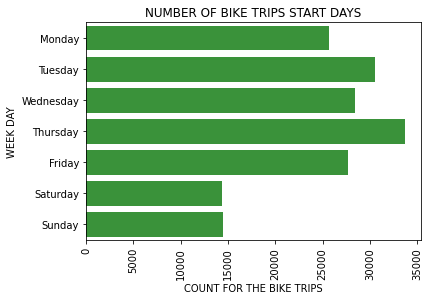

In [26]:
base_color = sb.color_palette()[2]
#getting a color from the color palette
dayorder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#using the countplot option from seaborn
sb.countplot(data = ford, y ='start_day', color = base_color, 
             order = dayorder);
plt.xticks(rotation = 90);
label('COUNT FOR THE BIKE TRIPS','WEEK DAY','NUMBER OF BIKE TRIPS START DAYS')

#### OBSERVATION
##### Thursday had the most start days for the bike trips 

#### QUESTION

##### WHAT DAYS HAVE THE HIGHEST NUMBER TO END DAYS

#### VISUALIZATION

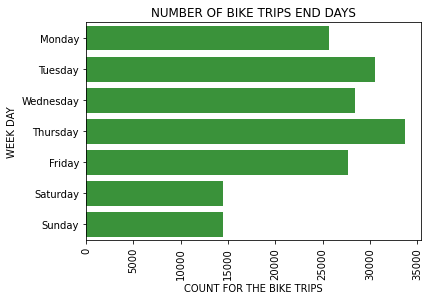

In [27]:
sb.countplot(data = ford, y ='end_day', color = base_color, 
             order = dayorder);
plt.xticks(rotation = 90);

label('COUNT FOR THE BIKE TRIPS','WEEK DAY','NUMBER OF BIKE TRIPS END DAYS')

#### OBSERVATION


#### Thursday also had the most end days for the bike trips 

#### QUESTION

##### WHICH GENDER WAS MORE INVOLVED IN THE BIKE TRIPS?

#### VISUALIZATION

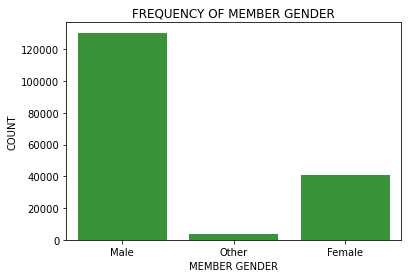

In [28]:
sb.countplot(data=ford,x = 'member_gender', color = base_color);

label('MEMBER GENDER','COUNT','FREQUENCY OF MEMBER GENDER')

#### OBSERVATION 

#### The bike trips were majorly dominated by male gender 

#### QUESTION

##### WHAT AGE RANGE WAS MOST INVOLVED IN THE BIKE TRIPS?

#### VISUALIZATION

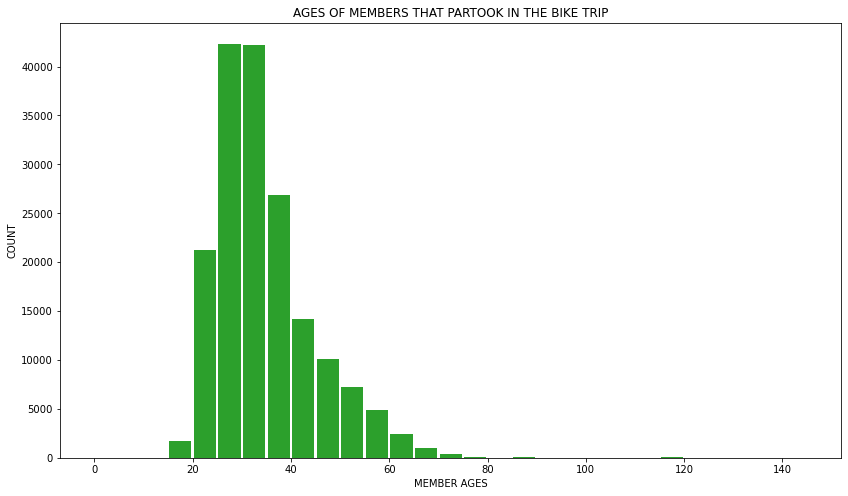

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

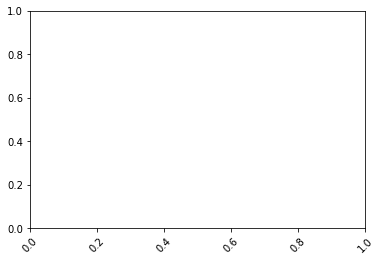

In [29]:
#ncreasing the size of the plot
plt.figure(figsize = [14,8])
#adding bins to make the plotting readable 
bins = np.arange(0,ford['age'].max()+5,5)
plt.hist(data=ford,x = 'age', color = base_color,bins= bins,rwidth = 0.9);
label('MEMBER AGES','COUNT','AGES OF MEMBERS THAT PARTOOK IN THE BIKE TRIP')
plt.xticks(rotation = 45)

#### OBSERVATION

##### The age range with higher participation is those within the age 20 - 40

#### QUESTION


#### WHAT IS THE HIGHEST DURATION RANGE?

#### VISUALIZATION 

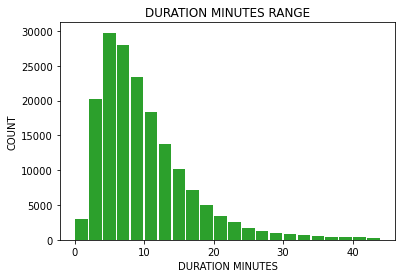

In [30]:
bins_ = np.arange(0,45,2) 
plt.hist(data=ford,x = 'duration_minutes', color = base_color,bins = bins_,rwidth = 0.9);
label('DURATION MINUTES','COUNT','DURATION MINUTES RANGE')

#### OBSERVATION

##### More people spent between 0-10 minutes for the race

#### QUESTION

##### WHICH USER TYPE ENGAGED MORE IN THE TRIPS? 

#### VISUALIZATION

Text(0.5, 1.0, 'Engagements from usertypes')

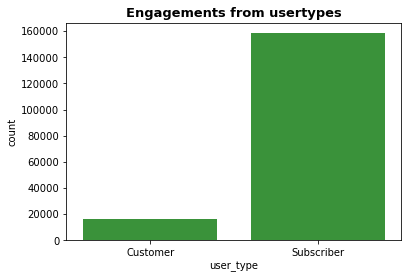

In [31]:
sb.countplot(data=ford,x = 'user_type', color = base_color);
plt.title('Engagements from usertypes', fontsize = 13, fontweight = 'bold')

#### OBSERVATION

##### The subscribers engaged more than the customers 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

##### USERTYPE, The user type was basicslly customers and subscribers , though subscribers engaged more than customers 
##### MEMBER GENDER , The member gender was basically Male, Female and other,the trips was dominated by the male, followed by the female with very much difference, and the 'other' gender has very little participation 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
##### No, asides from the member birth year I had gotten the age column from and I also had to arange the weekdays to be in order irrespective of the frequncy

## Bivariate Exploration

#### QUESTION

##### Does the age infuence the user type?

#### VISUALIZATION

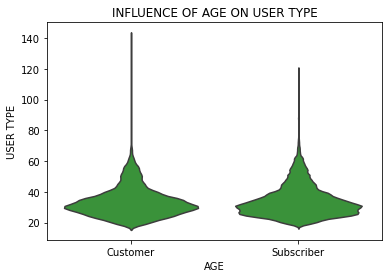

In [32]:
sb.violinplot(data = ford, x = 'user_type',y = 'age',color = base_color, inner = None);
label('AGE','USER TYPE','INFLUENCE OF AGE ON USER TYPE')

#### OBSERVATION 

##### The age groups are spread accross the usertypes 

#### QUESTION 
##### Are the participating genders influenced by age too?

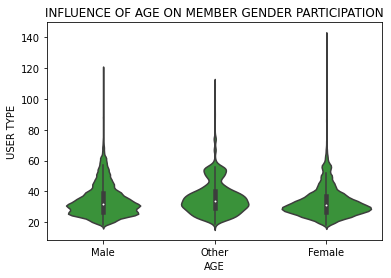

In [33]:
sb.violinplot(data = ford, x = 'member_gender',y = 'age', color = base_color);
label('AGE','USER TYPE','INFLUENCE OF AGE ON MEMBER GENDER PARTICIPATION')

#### OBSERVATIONS 

##### No, the group is largely dominated by those within the 20 and 40 years age group spread accross the genders, so the age  really doesn't affect the gender 

#### QUESTION
##### Did subscribers spend more time on bike trips?

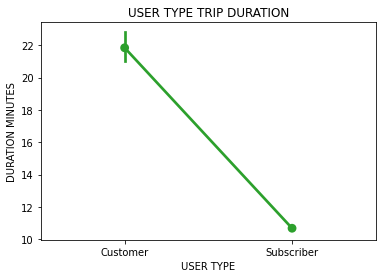

In [34]:
sb.pointplot(data = ford, x = 'user_type',y = 'duration_minutes', color = base_color);
label('USER TYPE','DURATION MINUTES','USER TYPE TRIP DURATION')

#### OBSERVATION

#####  Customers spent longer time on trips than subscribers 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

##### I observed that though the trips were largely dominated by men, the age group that dominated the trip was those between age 20 and 40 and there were more subscribers but customers cycled more hours 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

##### I did notice that the usertype and member gender influenced the duration minute

## Multivariate Exploration

#### QUESTION

##### what is the relationship between startday and duration by user type

#### VISUALIZATION

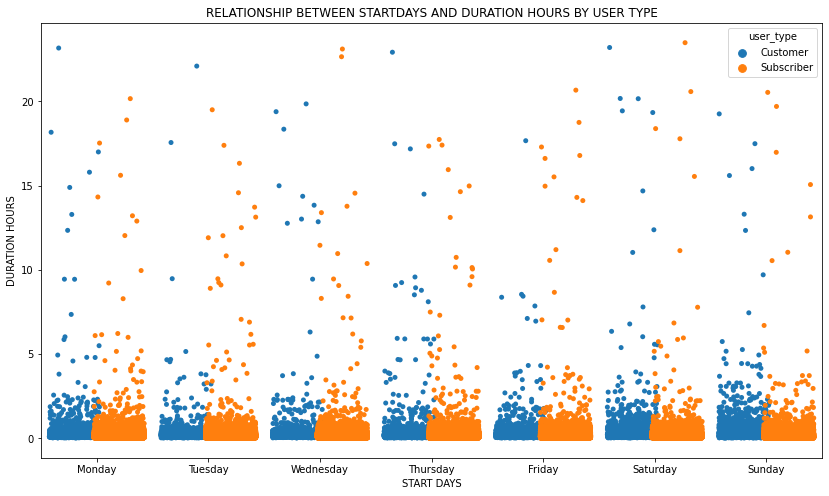

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


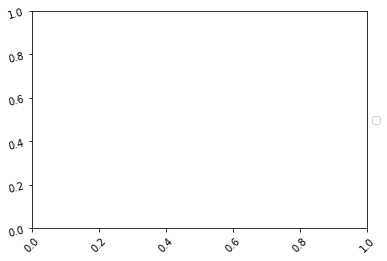

In [35]:
plt.figure(figsize=[14,8])
sb.stripplot(data = ford, x = 'start_day', y = 'duration_hours', hue = 'user_type',order = dayorder, jitter = 0.45, dodge = True)
label('START DAYS','DURATION HOURS','RELATIONSHIP BETWEEN STARTDAYS AND DURATION HOURS BY USER TYPE')
plt.xticks(rotation =45)
plt.yticks(rotation = 15)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure


#### OBSERVATION

##### On the Saturdays and Sundays of startdays, and mondays and fridays have a little bit more participations customers, so it can be said that the maybe majority of the customers went to their workplaces on Mondays and stayed there for the week whilst some they returned on fridays for the weekend  and many other customer returned on saturday  and sunday. On the other hand subscribers maybe people who retuned to their homes daily, hence the consistency in their duration over the week. 

#### QUESTION

##### On the start days, does the member gender affect the duration hours

#### VISUALIZATION

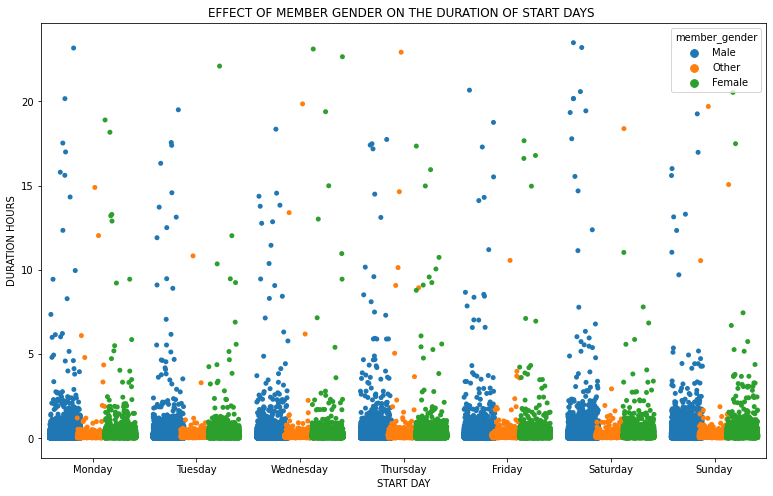

In [36]:
plt.figure(figsize = [13,8])
sb.stripplot(data = ford, x = 'start_day', y = 'duration_hours', hue = 'member_gender',order = dayorder, jitter = 0.45, dodge = True)
label('START DAY','DURATION HOURS','EFFECT OF MEMBER GENDER ON THE DURATION OF START DAYS ')

#### OBSERVATION
##### On everyday of the start days , more of the male gender spent more hours on bike trips than the female and other gender, so yes the gender affected the duration 

#### QUESTION

##### On the start days, does the member gender affect the duration hours

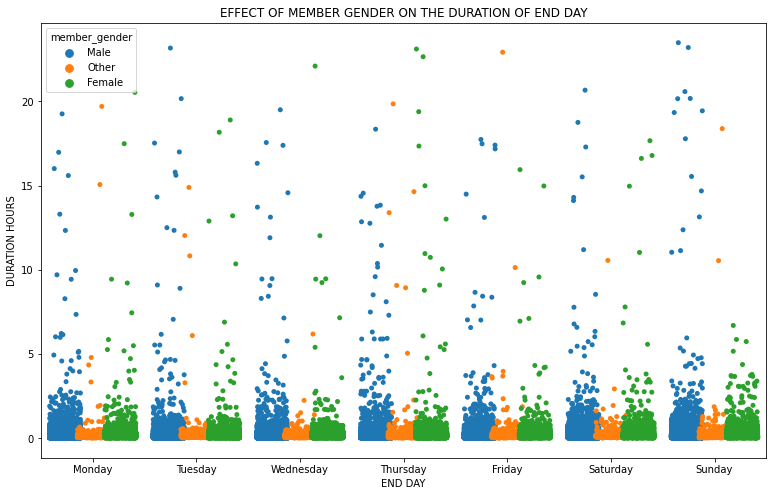

In [37]:
plt.figure(figsize = [13,8])
sb.stripplot(data = ford, x = 'end_day', y = 'duration_hours', hue = 'member_gender',order = dayorder, jitter = 0.45, dodge = True)
label('END DAY','DURATION HOURS','EFFECT OF MEMBER GENDER ON THE DURATION OF END DAY')

#### OBSERVATION
##### On everyday of the end days , more of the male gender spent more hours on bike trips than the female and other gender, so yes the gender affected the duration 

#### QUESTION

##### Was age a factor that determined gender present the start of the bike trips?

#### VISUALIZATION

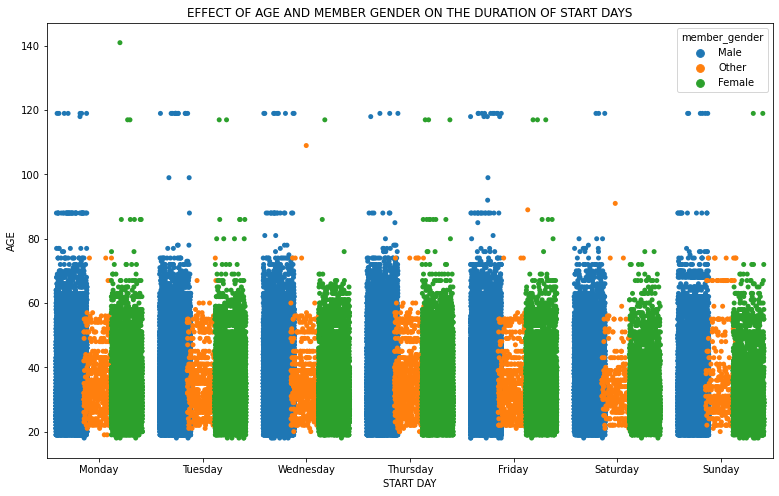

In [38]:
plt.figure(figsize = [13,8])
sb.stripplot(data = ford, x = 'start_day', y = 'age', hue = 'member_gender',order = dayorder, jitter = 0.45, dodge = True)
label('START DAY','AGE','EFFECT OF AGE AND MEMBER GENDER ON THE DURATION OF START DAYS')

#### OBSERVATION
##### Age wasn't a factor as everyday,  there was a consistent kind of turnup amongs the gender 

#### QUESTION

#### VISUALIZATION

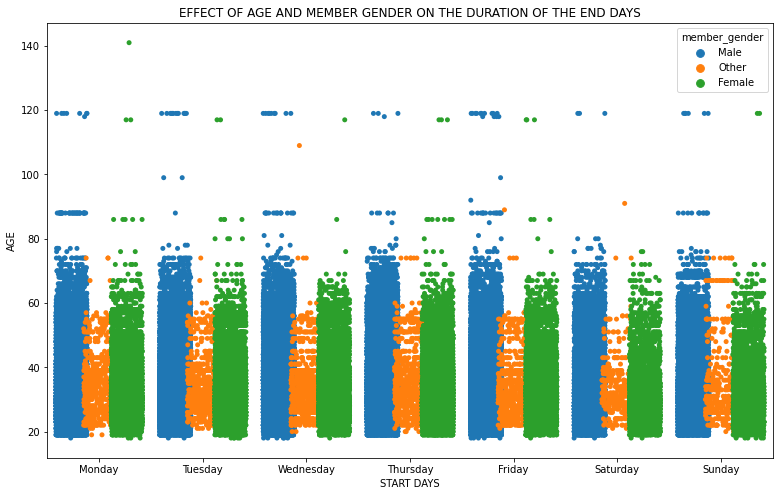

In [39]:
plt.figure(figsize = [13,8])
sb.stripplot(data = ford, x = 'end_day', y = 'age', hue = 'member_gender',order = dayorder, jitter = 0.45, dodge = True)
label('START DAYS','AGE','EFFECT OF AGE AND MEMBER GENDER ON THE DURATION OF THE END DAYS')

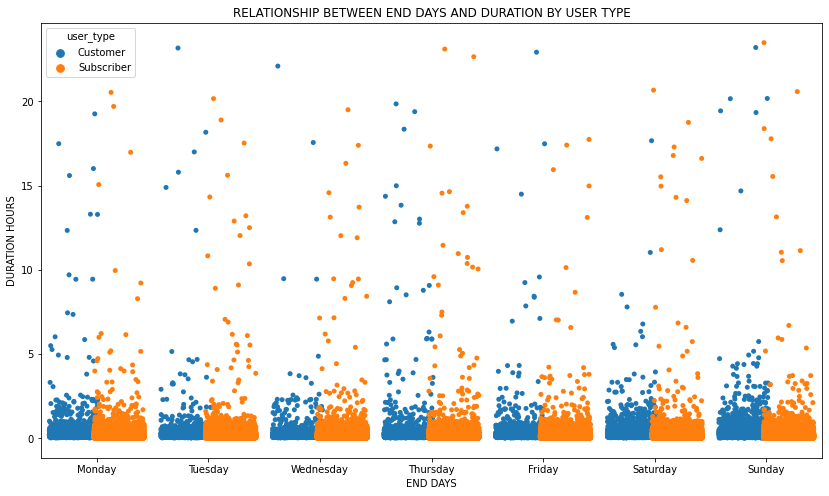

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


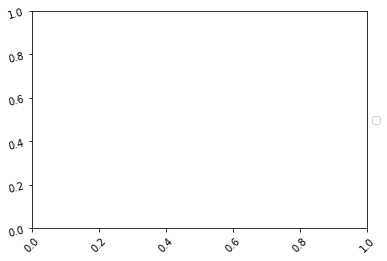

In [40]:
plt.figure(figsize=[14,8])
sb.stripplot(data = ford, x = 'end_day', y = 'duration_hours', hue = 'user_type',order = dayorder, jitter = 0.45, dodge = True)
label('END DAYS','DURATION HOURS','RELATIONSHIP BETWEEN END DAYS AND DURATION BY USER TYPE')
plt.xticks(rotation =45)
plt.yticks(rotation = 15)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure

#### OBSERVATION

#### Customers engaged more on Saturday and Sunday only of the end days , so that can be said that customers are majorly of the working class, as they took longer trips during weekends than weekdays 

#### QUESTION

##### DOES THE AGE OF THE USER TYPE AFFECT THE START DAYS

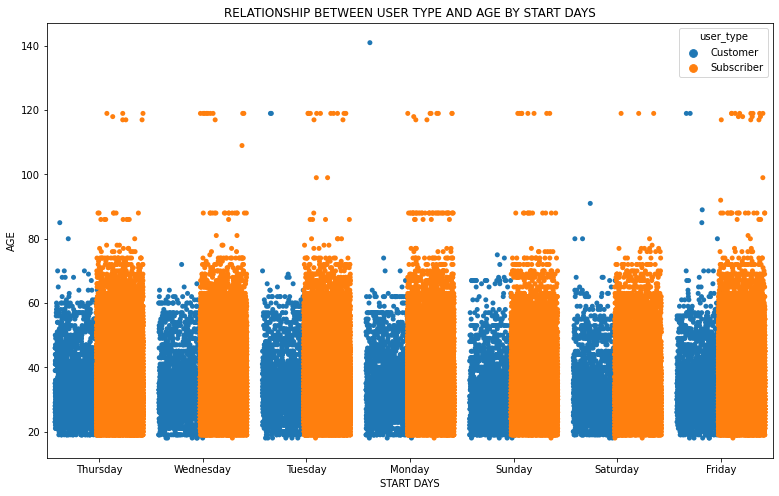

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

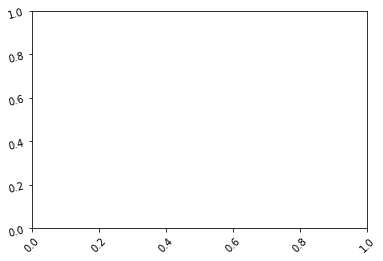

In [41]:
plt.figure(figsize = [13,8])
sb.stripplot(data = ford, x = 'start_day', y = 'age', hue = 'user_type', jitter = 0.45, dodge = True)
label('START DAYS','AGE','RELATIONSHIP BETWEEN USER TYPE AND AGE BY START DAYS')
plt.xticks(rotation =45)
plt.yticks(rotation = 15)

#### OBSERVATION

#### The customers are younger than the subscribers, this affirms the earlier suggestion that customers ae more active on weekends because they have work on weekdays

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest
##### I observed a relationship between the duration and start days and enddays by the user type. I observed that the customers and subscribers of the user type didnt spend the same duraton everyday, there were higher engagements  on weekends for customers both on start days and end days 

### Were there any interesting or surprising interactions between features?
##### The relationship between age and user type that could give up how each day in their week went

## Conclusions

##### *The member gender wasnt really affected by the ages, because both young and old were spread across the gender 
##### *The customers of the usertype were majorly young working class people, so they were more active on weekends 
##### * The subscribers of the user type had more old people
##### * The male gender dominated the bike trips and had longer durations
